In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
train_data.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

### Breaking down the Cabin feature

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [4]:
cabin_train_data = train_data["Cabin"].str.split(pat = "/", expand=True)
split_cabin_train = cabin_train_data.rename(columns={0: "deck", 1: "num", 2: "side"})

split_cabin_train.head(6)

,deck,num,side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
5,F,0,P


In [5]:
split_cabin_train.nunique()

deck       8
num     1817
side       2
dtype: int64

We can see "num" has too many values while "deck" and "size" don't. We'll ignore it as it is probably not important.
We can also see the 2 sides can have decks named the same, so we cant use just the deck feature.

In [6]:
cabin_test_data = test_data["Cabin"].str.split(pat = "/", expand=True)
split_cabin_test = cabin_test_data.rename(columns={0: "deck", 1: "num", 2: "side"})

In [7]:
train_data = train_data.drop("Cabin", axis = 1).join(split_cabin_train[["deck", "side"]])
test_data = test_data.drop("Cabin", axis = 1).join(split_cabin_test[["deck", "side"]])

train_data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,S


# Encoding the categorical data 

Note that in the precess we drop the columns: "PassengerId" ans "Name", as they are not needed.

### **It was wrong to Encode the HomePlanet, Destination, deck and side features with Ordinal Encoding as there is no meaningful order between them**

Is planer Earth better then Europa? Is deck G higher than C and F? We don't know and can't tell.

This will be fixed on the next version annd it's interesting to see how much of a difference it will make.

In [8]:
from sklearn.preprocessing import OrdinalEncoder

categorical_data = ["HomePlanet", "CryoSleep", "Destination", "VIP", "deck", "side"]
other_data = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

encoder = OrdinalEncoder()

temp_np_array = encoder.fit_transform(train_data[categorical_data])
encoded_train_df = pd.DataFrame(data = temp_np_array, columns = categorical_data)
train_data = encoded_train_df.join(train_data[other_data]).join(train_data["Transported"])

temp_np_array = encoder.transform(test_data[categorical_data])
encoded_test_df = pd.DataFrame(data = temp_np_array, columns = categorical_data)
test_data = encoded_test_df.join(test_data[other_data])

test_data.head()

,HomePlanet,CryoSleep,Destination,VIP,deck,side,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,1.0,2.0,0.0,6.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,5.0,1.0,19.0,0.0,9.0,0.0,2823.0,0.0
2,1.0,1.0,0.0,0.0,2.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,2.0,0.0,2.0,1.0,38.0,0.0,6652.0,0.0,181.0,585.0
4,0.0,0.0,2.0,0.0,5.0,1.0,20.0,10.0,0.0,635.0,0.0,0.0


# Encoding the label

In [9]:
train_data["Transported"] = train_data["Transported"].transform(lambda x: 1.0 if x == True else 0.0)

train_data.head(15)


,HomePlanet,CryoSleep,Destination,VIP,deck,side,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,2.0,0.0,1.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,5.0,1.0,24.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1.0,0.0,2.0,1.0,0.0,1.0,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,1.0,0.0,2.0,0.0,0.0,1.0,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0.0,0.0,2.0,0.0,5.0,1.0,16.0,303.0,70.0,151.0,565.0,2.0,1.0
5,0.0,0.0,1.0,0.0,5.0,0.0,44.0,0.0,483.0,0.0,291.0,0.0,1.0
6,0.0,0.0,2.0,0.0,5.0,1.0,26.0,42.0,1539.0,3.0,0.0,0.0,1.0
7,0.0,1.0,2.0,0.0,6.0,1.0,28.0,0.0,0.0,0.0,0.0,NaN,1.0
8,0.0,0.0,2.0,0.0,5.0,1.0,35.0,0.0,785.0,17.0,216.0,0.0,1.0
9,1.0,1.0,0.0,0.0,1.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0


# Checking for NaN values

In [10]:
train_data.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
VIP             203
deck            199
side            199
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [11]:
201 + 217 + 182 + 203 + 199 + 199 + 179 + 181 + 183 + 208 + 183 + 188
#number of missing values

2323

In [12]:
train_data[train_data.isnull().any(axis=1)].shape[0]
#rows which have at least one missing value

1929

In [13]:
2323 - 1929

394

We can see that there are only 2323 - 1929 = 394 rows which have more than one missing values.

If this numer were larger, it would have meant most of the missing data appeared on those rows - and we'd remove them since they were useless (filled with mostly missng data).

Since this is not the case, and each feature has a relatively small number of missing data, we'll impute them instead.

## Imputing the continous features first 

Which are Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

we'll check first if they need to be normalized

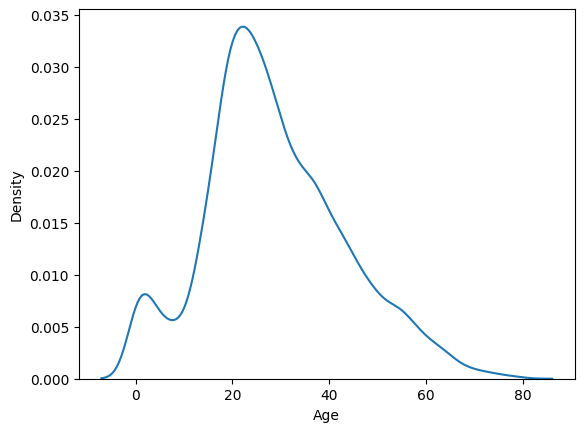

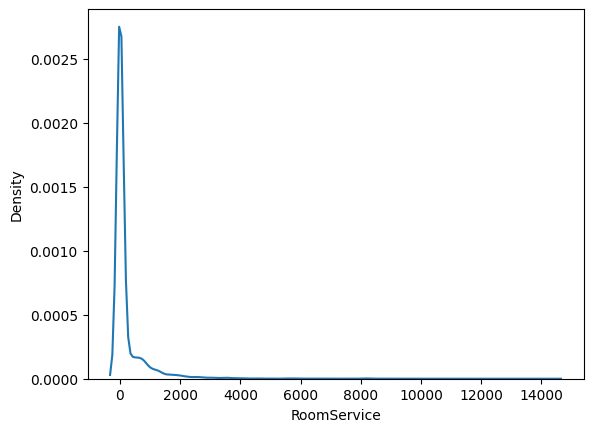

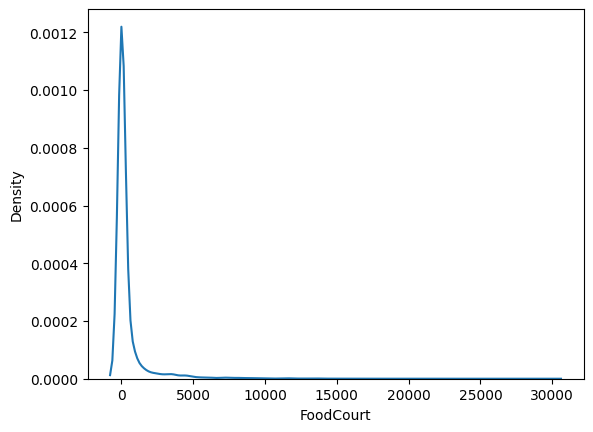

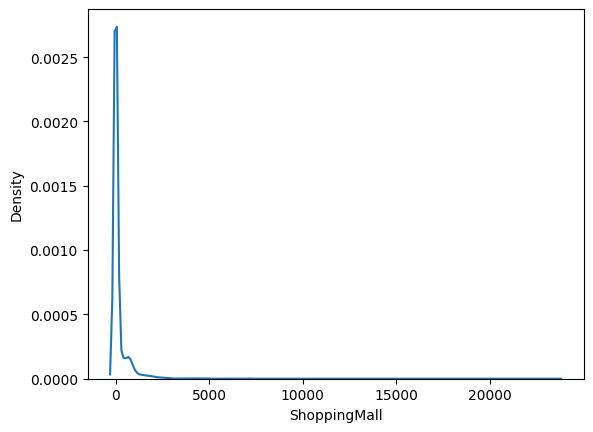

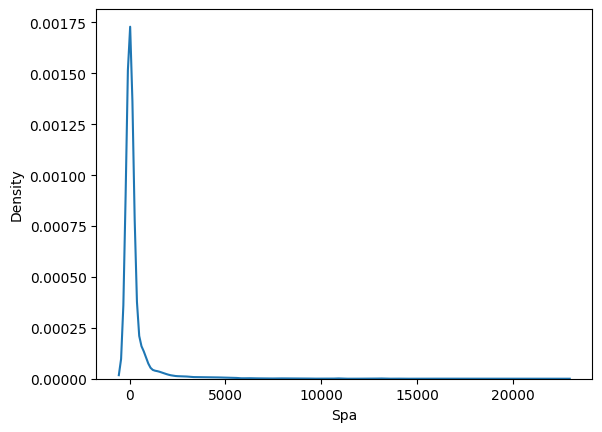

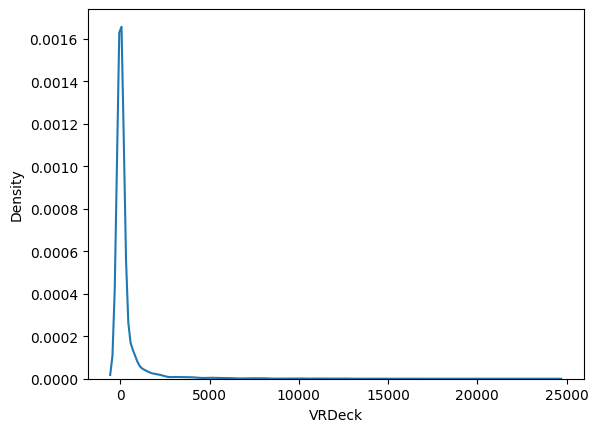

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

continous = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for feature in continous:
    plt.figure() #this creates a new figure on which each plot will appear
    sns.kdeplot (train_data[feature])
    #sns.boxplot (train_data[feature])

### We can see the each feature is distributed fairly normally (with positive values), but Age and the other featrues are on completely different scale,

### and that might not sit well with some models. So we'll scale the continous data.

 As for outliers we can see a single anomily only in "ShoppingMall",

but it does make sense that it could be a real observation of someone who spent a lot more than the rest.

# Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_data[continous] = scaler.fit_transform(train_data[continous])
test_data[continous] = scaler.transform(test_data[continous])

train_data.describe()

,HomePlanet,CryoSleep,Destination,VIP,deck,side,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8492.000000,8476.000000,8511.000000,8490.000000,8494.000000,8494.000000,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,0.665214,0.358306,1.483492,0.023439,4.305392,0.504827,0.364911,0.015683,0.015365,0.007395,0.013885,0.012632,0.503624
std,0.798155,0.479531,0.820237,0.151303,1.778233,0.500006,0.183405,0.046536,0.054053,0.025741,0.050728,0.047475,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.240506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000,5.000000,1.000000,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,6.000000,1.000000,0.481013,0.003281,0.002549,0.001149,0.002633,0.001906,1.000000
max,2.000000,1.000000,2.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Now heaving the data scaled, we can fill in the missing values

In [16]:
from sklearn.impute import SimpleImputer

continous_imp = SimpleImputer (strategy='mean') #this is also the standard option
discrete_imp = SimpleImputer (strategy='most_frequent')

discrete = ["HomePlanet", "CryoSleep", "Destination", "VIP", "deck", "side"]

train_data[continous] = continous_imp.fit_transform(train_data[continous])
train_data[discrete] = discrete_imp.fit_transform(train_data[discrete])

test_data[continous] = continous_imp.transform(test_data[continous])
test_data[discrete] = discrete_imp.transform(test_data[discrete])

test_data.isna().sum()
# There is no more missind data on bothe the train and test sets.

HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
deck            0
side            0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

### Now we can probably start training model and see which is the best with cross validation before choosing one and running it on the test set

First well create the models and test them with their default parameters.

# Model Training

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost

logistic_regression = LogisticRegression(max_iter=1000, random_state = 0)
svc = SVC(random_state = 0)
naive_bayes = GaussianNB()
random_forest = RandomForestClassifier(random_state = 0)
xgb = xgboost.XGBClassifier(random_state = 0)

In [18]:
from sklearn.model_selection import cross_val_score

X = train_data.copy()
y = X.pop ("Transported") #pop extracts the desired column and drops it from the dataset if came from.

In [19]:
# The model is tested on "accuracy" so this scorer will make sure our model are also tested on accuracy (and not their default scoring matric) in the cross validation.
from sklearn.metrics import make_scorer, accuracy_score

accuracy_scorer = make_scorer(accuracy_score)

logistic_regression_scores = cross_val_score(logistic_regression, X, y, scoring = accuracy_scorer, cv = 5)
svc_scores = cross_val_score(svc, X, y, scoring = accuracy_scorer, cv = 5)
naive_bayes_scores = cross_val_score(naive_bayes, X, y, scoring = accuracy_scorer, cv = 5)
random_forest_scores = cross_val_score(random_forest, X, y, scoring = accuracy_scorer, cv = 5)
xgb_scores = cross_val_score(xgb, X, y, scoring = accuracy_scorer, cv = 5)

In [20]:
models = {"logistic regression" : logistic_regression_scores,
         "svc" : svc_scores,
         "naive_bayes" : naive_bayes_scores,
         "random forest" : random_forest_scores,
         "XGBoost" : xgb_scores,}

for key, value in models.items():
    print (f"The average accuracy score of model: {key} is: {value.mean()} ")

The average accuracy score of model: logistic regression is: 0.7647544883472704 
The average accuracy score of model: svc is: 0.7248384221451822 
The average accuracy score of model: naive_bayes is: 0.7028662161169568 
The average accuracy score of model: random forest is: 0.7862658657972421 
The average accuracy score of model: XGBoost is: 0.7919032736431066 


### We can see a very tight competition with the best models being:

1. XGBoost
2. Random Forest
3. Logistic regression

Perhaps the logistic regression would have fared better if the encoding was One Hot

# Without optimizing any of the models, let's create the first submission of results from the test set from these 3 models

In [21]:
original_test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

### Predicting using the **XGBoost** model and formating its predictions to be sent off

In [22]:
xgb.fit(X,y)
xgb_pred = pd.Series(xgb.predict(test_data))

# returning the predictions to a format of True-False instead of 1/0
xgb_pred = xgb_pred.transform(lambda x: True if x == 1.0 else False)

#joining the list of passender ID's with the list of their predictions
xgb_to_submit = pd.concat([original_test_data["PassengerId"], xgb_pred], axis=1)

#renaming the predicions column
xgb_to_submit.rename(columns={0: "Transported"}, inplace = True)
xgb_to_submit.set_index('PassengerId', inplace = True)

xgb_to_submit.to_csv("/kaggle/working/XGBoost_submission")

### Predicting using the **Random Rorest** model and formating its predictions to be sent off

In [23]:
random_forest.fit(X,y)
rf_pred = pd.Series(random_forest.predict(test_data))

# returning the predictions to a format of True-False instead of 1/0
rf_pred = rf_pred.transform(lambda x: True if x == 1.0 else False)

#joining the list of passender ID's with the list of their predictions
rf_to_submit = pd.concat([original_test_data["PassengerId"], rf_pred], axis=1)

#renaming the predicions column
rf_to_submit.rename(columns={0: "Transported"}, inplace = True)
rf_to_submit.set_index('PassengerId', inplace = True)

rf_to_submit.to_csv("/kaggle/working/Random_Forest_submission")

### Predicting using the **Logistic Regression** model and formating its predictions to be sent off

In [24]:
logistic_regression.fit(X,y)
lr_pred = pd.Series(logistic_regression.predict(test_data))

# returning the predictions to a format of True-False instead of 1/0
lr_pred = lr_pred.transform(lambda x: True if x == 1.0 else False)

#joining the list of passender ID's with the list of their predictions
lr_to_submit = pd.concat([original_test_data["PassengerId"], lr_pred], axis=1)

#renaming the predicions column
lr_to_submit.rename(columns={0: "Transported"}, inplace = True)
lr_to_submit.set_index('PassengerId', inplace = True)

lr_to_submit.to_csv("/kaggle/working/Logistic_Regression_submission")

# END